# Time Evolution of a Particle in a Parabolic Well

A good resource: http://macbeth.if.usp.br/~gusev/parabolic%20well.pdf

In [ ]:
import numpy as np
import scipy.integrate as it
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

In [ ]:
# define constants

k = 1 # spring constant - potential is kx^2/2
me = 1 # mass of an electron
hbar = 1
x=np.linspace(-6, 6,500)

alpha = -np.sqrt(k*me)/(2*hbar)

In [ ]:
# define parabolic eigenstuffs
def hermite(n): # https://math.stackexchange.com/questions/581897/hermite-polynomials-recurrence-relation for derivation
    if (n == 0):
        return lambda x : 1
    elif (n == 1):
        return lambda x : 2*x
    else:
        return lambda x : hermite(n-1)(x)*2*x - hermite(n-2)(x)*2*(n-1)

def normalize(psi):
    integral = it.simps(np.absolute(psi)**2, x)
    return psi/np.sqrt(integral)

eigenfunc = lambda n : normalize(hermite(n)(x)*np.exp(alpha*(x**2)))
eigenenergy = lambda n : (n+0.5)*hbar*np.sqrt(k/me)

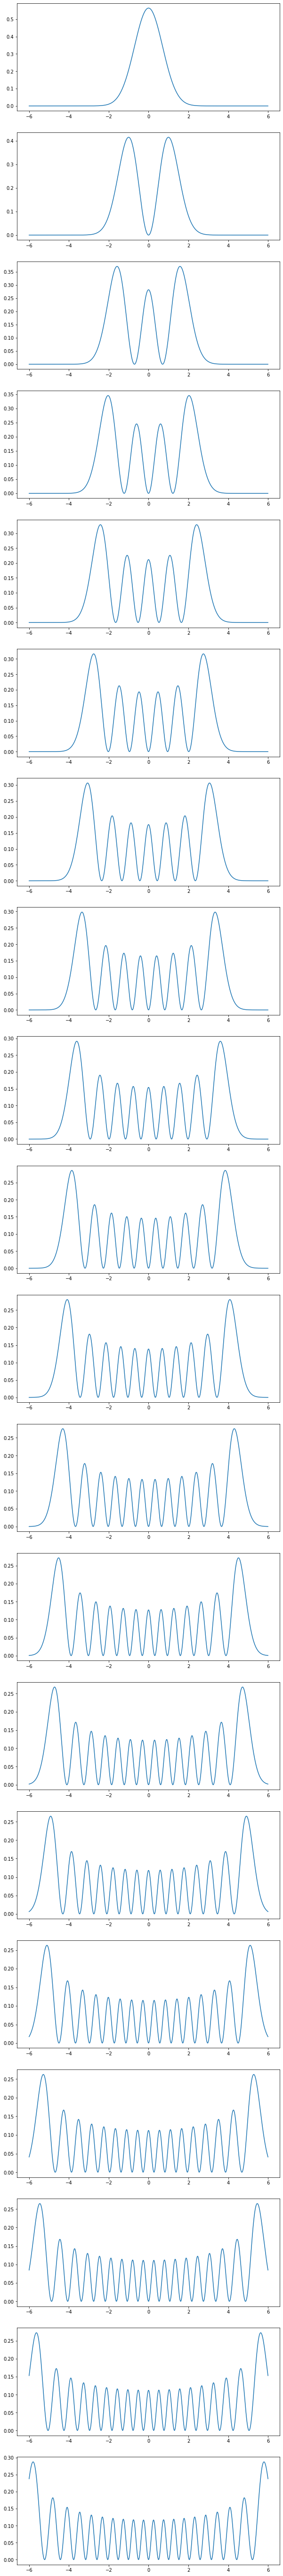

In [ ]:
num = 20
fig, axes = plt.subplots(num, figsize=(10, 5*num))
for i in range(num):
    axes[i].plot(x, np.absolute(eigenfunc(i))**2)

#plt.plot(x, k*x**2/2)

In [ ]:
# time evolution! 

# the wave is an equal superposition of the first num_states eigenstates 

def get_prob(t, num_states=5):
    weight = 1/np.sqrt(num_states)
    wave_t = np.zeros(x.shape, dtype='complex128') # wave at time t
    for n in range(num_states):
        wave_t += weight*eigenfunc(n)*np.exp(-1j*eigenenergy(n)*t/hbar)
    return np.absolute(wave_t)**2

def get_time_wave(iterations, time_step, num_states=5):
    xs = np.hstack([x for i in range(iterations)])
    probs = np.hstack([get_prob(i*time_step, num_states=num_states) for i in range(iterations)])
    times = np.hstack([np.full(x.shape, i*time_step) for i in range(iterations)])
    data = np.transpose(np.array([xs, probs, times]))
    print(data.shape)
    df = pd.DataFrame(data, columns=['x', 'prob', 'time'])
    return df

In [ ]:
wave = get_time_wave(100, 0.1, num_states=5)

(50000, 3)


In [ ]:
fig = px.line(wave, x="x", y="prob", animation_frame="time") # https://plotly.com/python/animations/#using-a-slider-and-buttons 

In [ ]:
fig = fig.update_layout(transition = {"duration": 100}) # https://plotly.com/python/reference/layout/

In [ ]:
fig

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c782e670-8153-4fc7-a9a3-0ae2dddfa952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>